# <center> My Name is Amir Aziz 
#### This is my First Task / Project with Meri Skill

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('Sales Data.csv')

# Dataset Analysis

In [3]:
#print head of dataset
df.head()

,S_No,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
df.drop('S_No', axis=1, inplace=True)


In [8]:
df.drop('Purchase Address', axis=1 , inplace=True)

In [10]:
# Check summary statistics
df.describe()


,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [11]:
# Check for missing values
print(df.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [12]:
# Check data types
print(df.dtypes)

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


# Sales Trends Analysis

In [14]:
# Convert 'Order Date' column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [28]:
# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year

# Group by month and calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales

,Year,Month,Sales
0,2019,1,1813586.44
1,2019,2,2202022.42
2,2019,3,2807100.38
3,2019,4,3390670.24
4,2019,5,3152606.75
5,2019,6,2577802.26
6,2019,7,2647775.76
7,2019,8,2244467.88
8,2019,9,2097560.13
9,2019,10,3736726.88


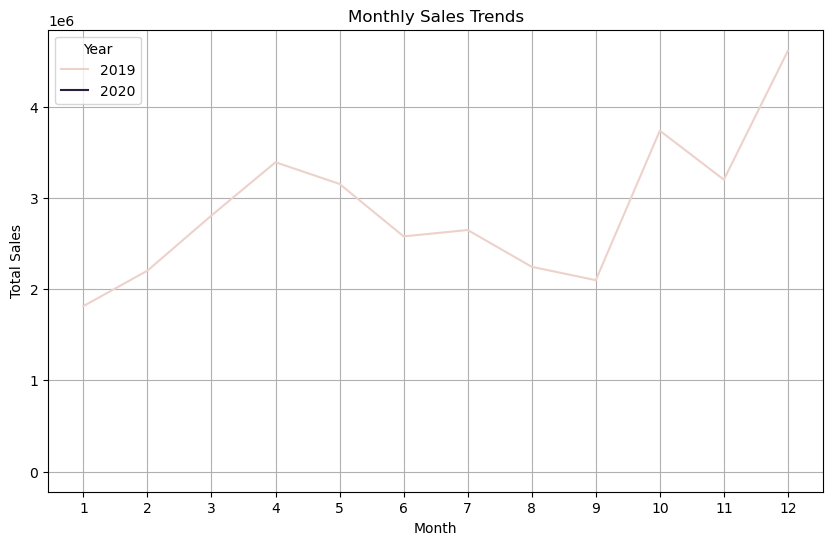

In [29]:
# Plot monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', hue='Year', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Top-Selling Products

In [31]:
# Group by product and calculate total quantity ordered
top_products = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sort products by quantity ordered
top_products = top_products.sort_values(by='Quantity Ordered', ascending=False)
top_products

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


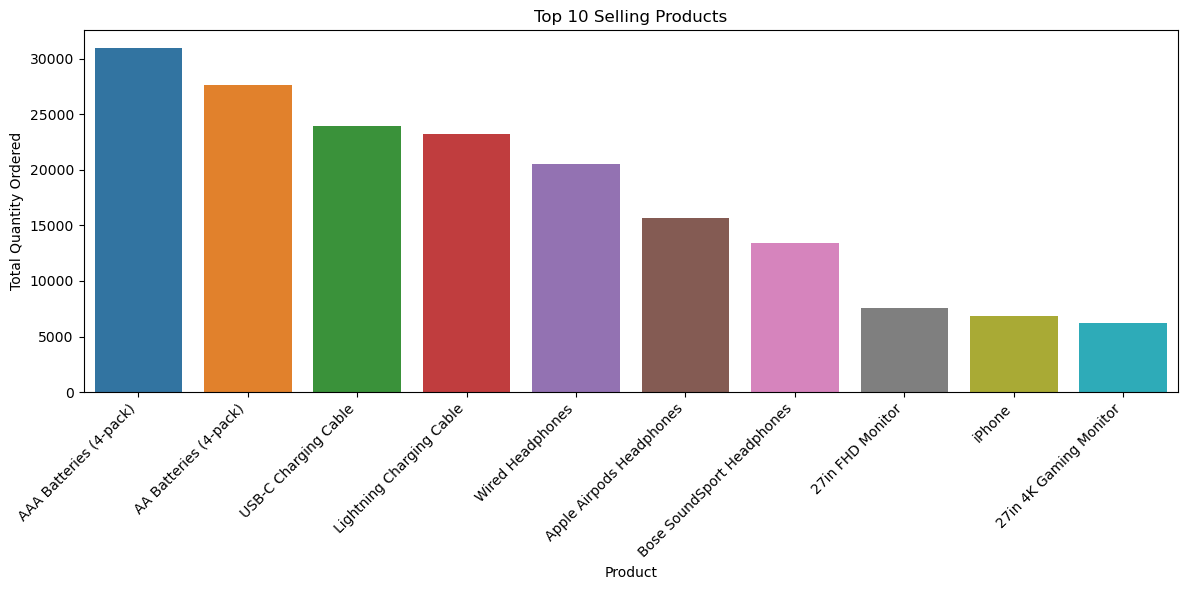

In [32]:
# Plot top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity Ordered', data=top_products.head(10))
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Revenue Metrics Calculation

In [34]:
# Calculate total sales
total_sales = df['Sales'].sum()

# Calculate total cost
df['Cost Price'] = df['Quantity Ordered'] * df['Price Each']
total_cost = df['Cost Price'].sum()

# Calculate profit
profit = total_sales - total_cost

# Calculate profit margin
if total_sales != 0:
    profit_margin = (profit / total_sales) * 100
else:
    profit_margin = 0

print('Total Sales:', total_sales)
print('Total Cost:', total_cost)
print('Profit Margin:', profit_margin)



Total Sales: 34492035.97
Total Cost: 34492035.97
Profit Margin: 0.0


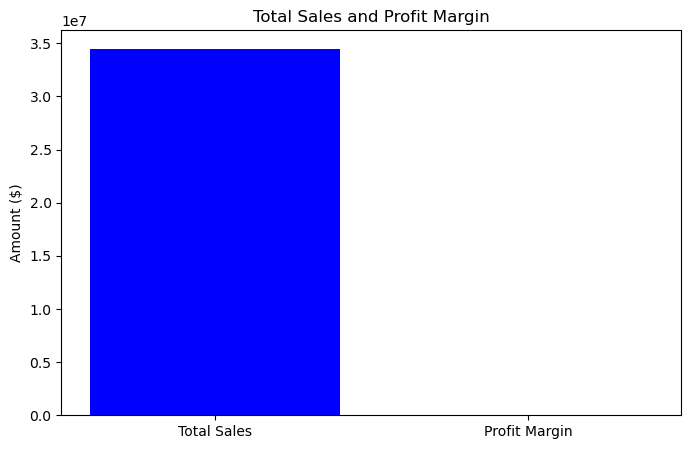

In [35]:
# Visualization
labels = ['Total Sales', 'Profit Margin']
values = [total_sales, profit_margin]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylabel('Amount ($)')
plt.title('Total Sales and Profit Margin')
plt.show()

## Sales Distribution by City

In [37]:
# Group by city and calculate total sales
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales

,City,Sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


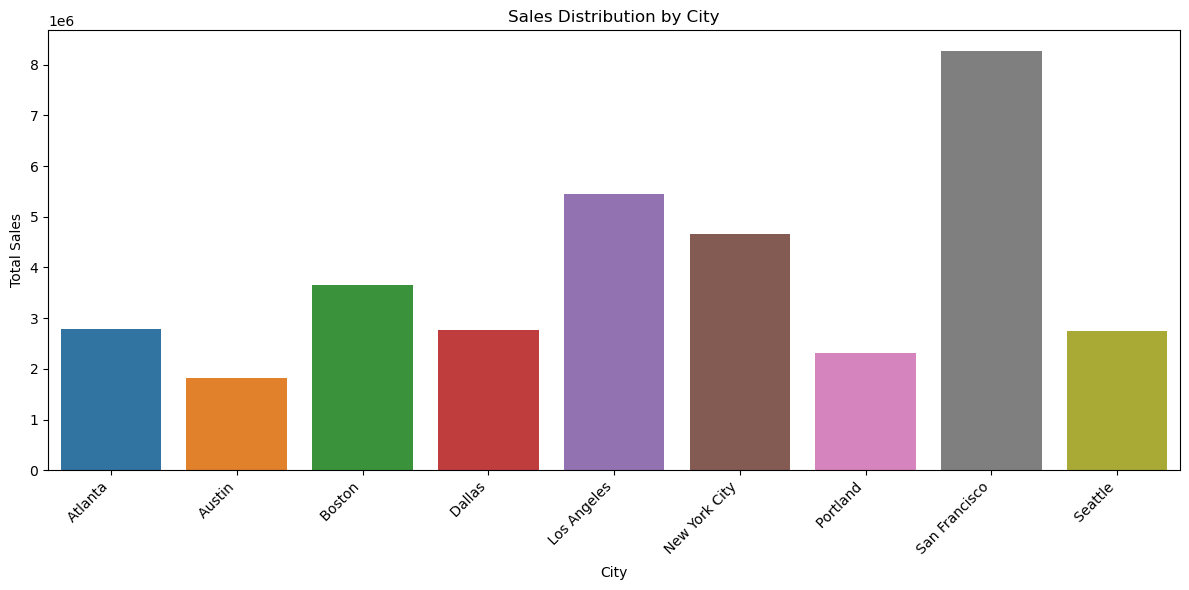

In [38]:
# Plot sales distribution by city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=city_sales)
plt.title('Sales Distribution by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Hourly Sales Analysis

In [40]:
# Group by hour and calculate total sales
hourly_sales = df.groupby('Hour')['Sales'].sum().reset_index()
hourly_sales

,Hour,Sales
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


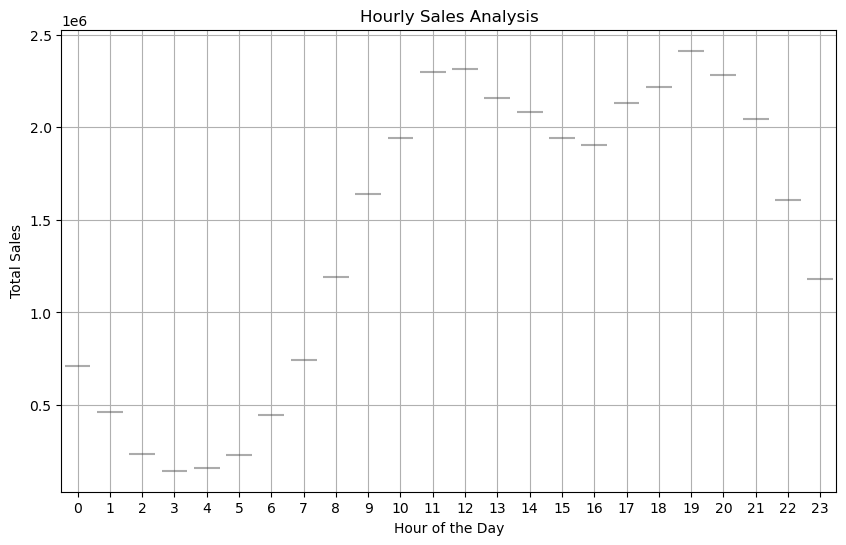

In [43]:
# Plot hourly sales analysis
plt.figure(figsize=(10, 6))
sns.boxenplot(x='Hour', y='Sales', data=hourly_sales)
plt.title('Hourly Sales Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


# Correlation Analysis 

In [45]:
# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()
correlation_matrix

,Order ID,Quantity Ordered,Price Each,Sales,Hour,Cost Price
Order ID,1.000000,0.000702,-0.002857,-0.002949,0.001175,-0.002949
Quantity Ordered,0.000702,1.000000,-0.148272,-0.139417,-0.002218,-0.139417
Price Each,-0.002857,-0.148272,1.000000,0.999203,0.001721,0.999203
Sales,-0.002949,-0.139417,0.999203,1.000000,0.001668,1.000000
Hour,0.001175,-0.002218,0.001721,0.001668,1.000000,0.001668
Cost Price,-0.002949,-0.139417,0.999203,1.000000,0.001668,1.000000


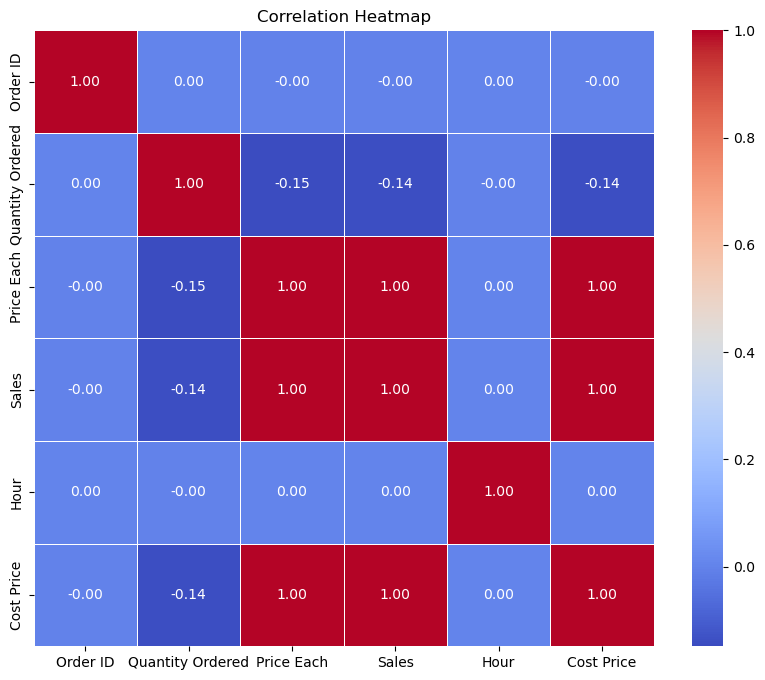

In [46]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


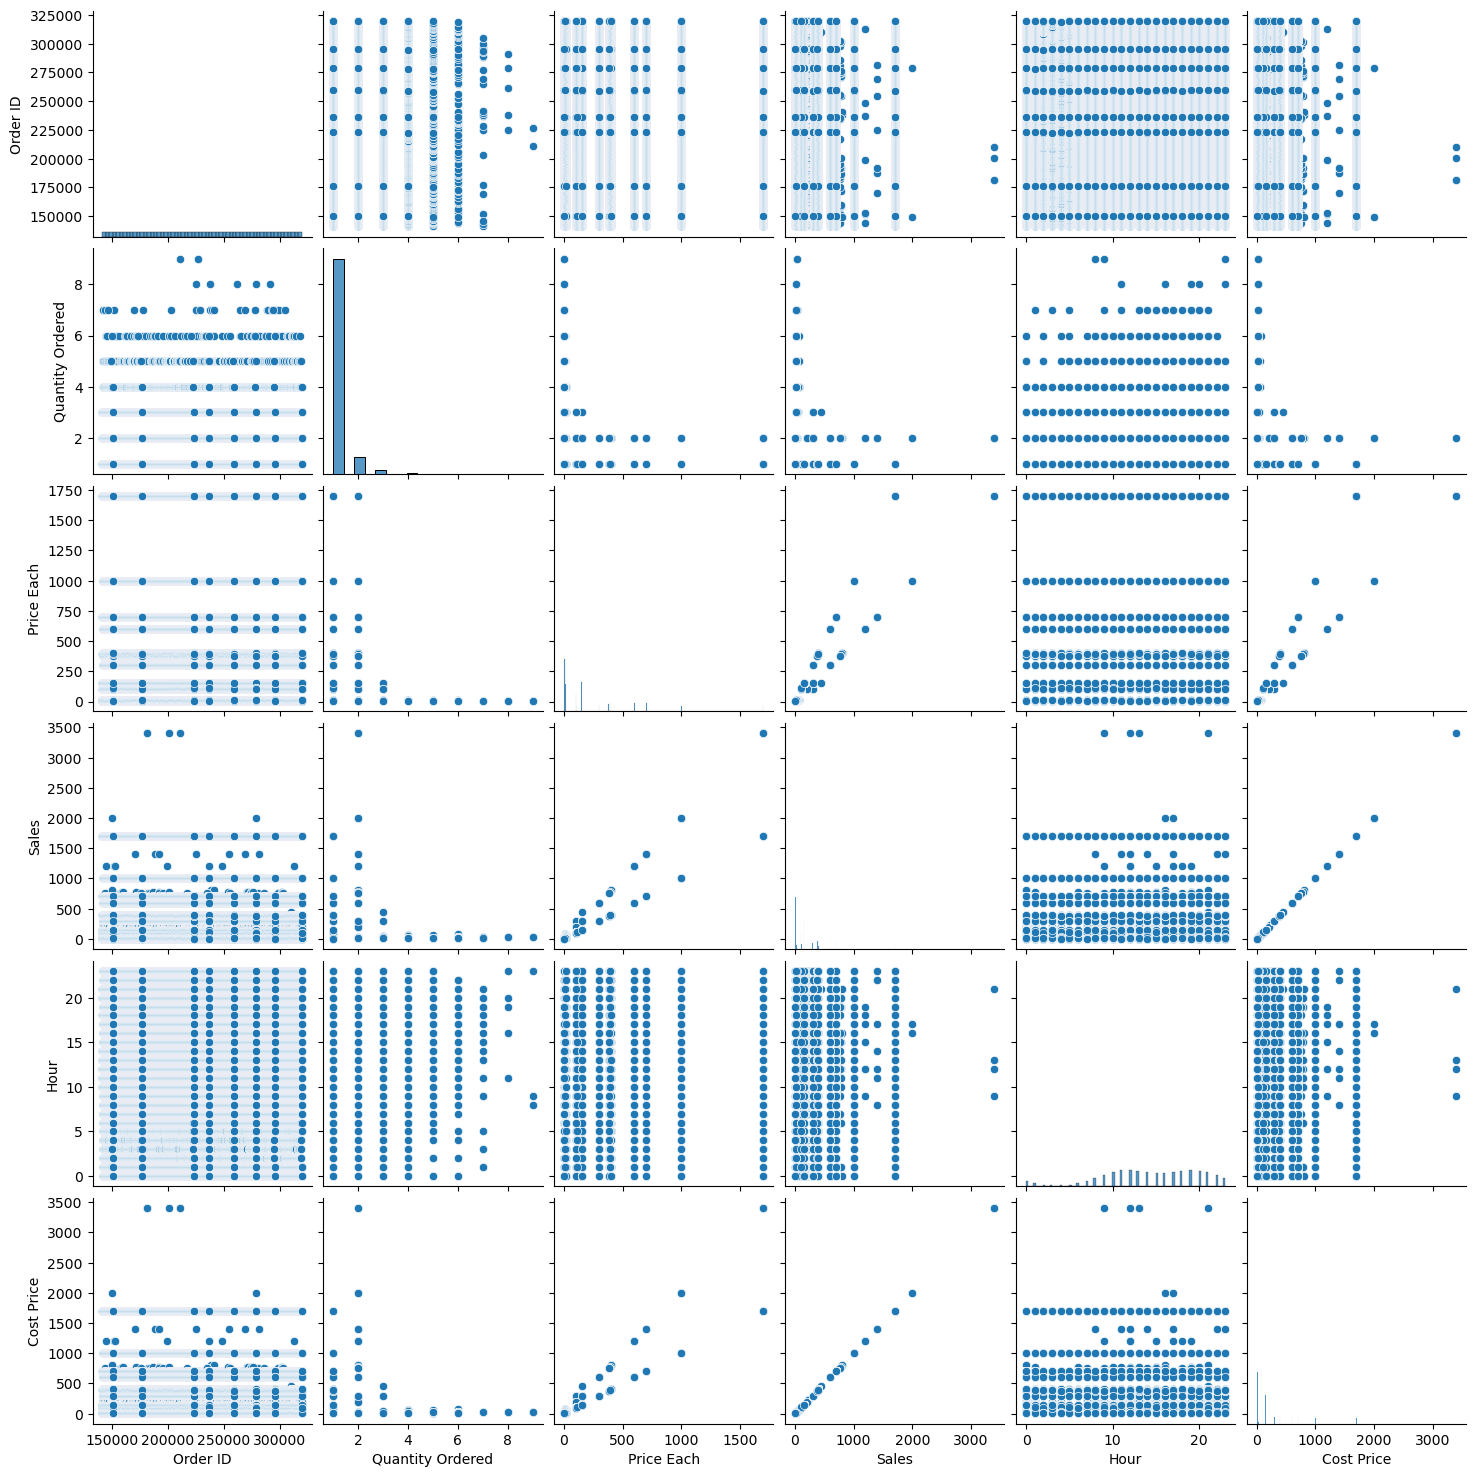

In [47]:
# Plot pairplot
sns.pairplot(numeric_cols)
plt.show()

# Product Revenue Contribution Analysis

In [48]:
# Calculate the revenue contribution of each product to overall sales
product_revenue_contribution = df.groupby('Product')['Sales'].sum() / total_sales * 100
product_revenue_contribution

Product
20in Monitor                   1.316677
27in 4K Gaming Monitor         7.059884
27in FHD Monitor               3.283148
34in Ultrawide Monitor         6.829281
AA Batteries (4-pack)          0.307661
AAA Batteries (4-pack)         0.268876
Apple Airpods Headphones       6.810703
Bose SoundSport Headphones     3.901090
Flatscreen TV                  4.191402
Google Phone                   9.623091
LG Dryer                       1.123738
LG Washing Machine             1.158528
Lightning Charging Cable       1.006302
Macbook Pro Laptop            23.302771
ThinkPad Laptop               11.973659
USB-C Charging Cable           0.830630
Vareebadd Phone                2.398235
Wired Headphones               0.714595
iPhone                        13.899730
Name: Sales, dtype: float64

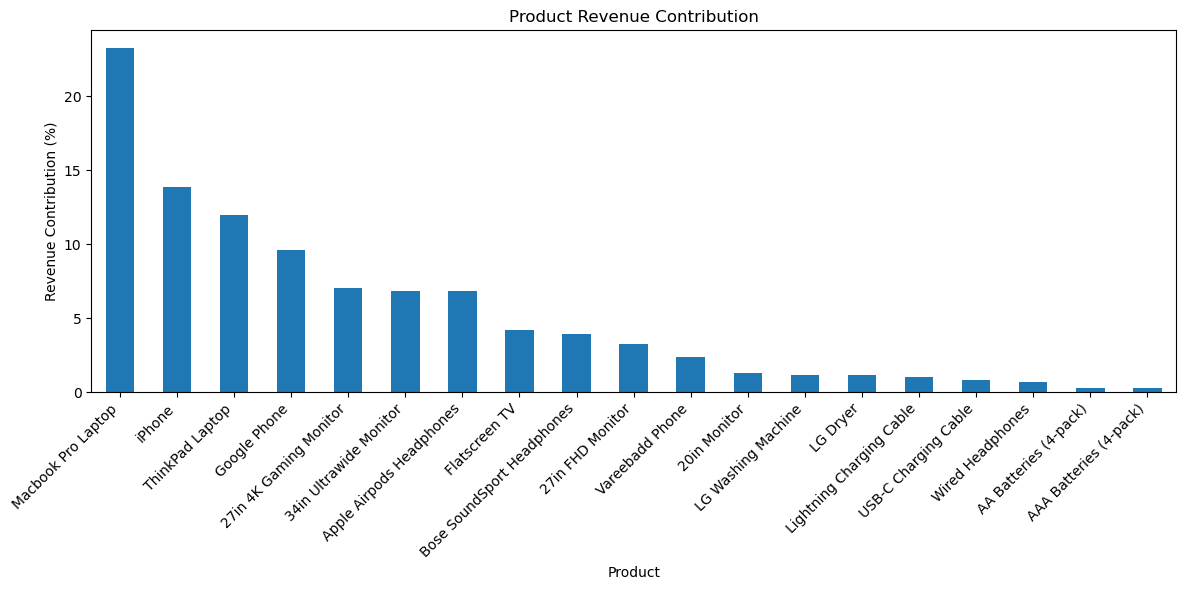

In [49]:
# Plot product revenue contribution
plt.figure(figsize=(12, 6))
product_revenue_contribution.sort_values(ascending=False).plot(kind='bar')
plt.title('Product Revenue Contribution')
plt.xlabel('Product')
plt.ylabel('Revenue Contribution (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---